# Data Processing

In [9]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import collections


In [10]:
# dfm = pd.read_csv("data/cleaned_data.csv")


# # na = NetworkAnalysis(dfm)


# g = nx.from_pandas_edgelist(dfm,                # the df containing the data
#                             source='from_address',        # first element of the dyad
#                             target='to_address',        # second element of the dyad
#                             edge_attr='value')
     

In [11]:
df = pd.read_csv("data/cleaned_data.csv")
# df = pd.read_csv("cleaned_data.csv")
df = df.drop(df.columns[0], axis=1)
df.head(5)

userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
contractSpace = df[(df.from_address_type == 'Contract')
                   & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | (
    (df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]


In [45]:
G_bipartiteSpace = nx.from_pandas_edgelist(bipartiteSpace,                # the df containing the data
                          source='from_address',        # first element of the dyad
                          target='to_address',        # second element of the dyad
                          edge_attr='value')


In [13]:
G_userSpace = nx.from_pandas_edgelist(userSpace,                # the df containing the data
                          source='from_address',        # first element of the dyad
                          target='to_address',        # second element of the dyad
                          edge_attr='value')

# Centrality

In [14]:
# import packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
from networkx.algorithms.community import girvan_newman, modularity
from pprint import pprint as pp
from operator import itemgetter
from networkx.algorithms import community
import seaborn as sns

In [15]:
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.algorithms import degree_centrality
from networkx.algorithms import betweenness_centrality
from networkx.algorithms import eigenvector_centrality

In [16]:
# Locating the Top nodes via Centrality in Bipartite Mode

In [17]:
# # compute centrality measures
# # --> degree centrality
# dg = degree_centrality(g)  #this will get us a dict
# # converting the degree into a list

# # my way 

# # dglist = []
# # for i in dg:
# #     dgvalue = dg[i]
# #     dglist.append(dgvalue)


# # --> betweenness centrality
# bc = betweenness_centrality(g)


# # --> eigenvector centrality
# # ec = eigenvector_centrality(g)
# ec = eigenvector_centrality(g, max_iter=100, tol=1e-04)



## One-Mode Space

### Betweenness Centrality

In [18]:
bet_centrality = nx.betweenness_centrality(G_userSpace)
nx.set_node_attributes(G_userSpace, bet_centrality, 'betweenness')


In [19]:
sorted_betweenness = sorted(
    bet_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)


Top 20 nodes by betweenness centrality:
('0x28c6c06298d514db089934071355e5743bf21d60', 0.27621937286641157)
('0xc098b2a3aa256d2140208c3de6543aaef5cd3a94', 0.07989949002676512)
('0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740', 0.057314525281045976)
('0x4ad64983349c49defe8d7a4686202d24b25d0ce8', 0.05260876405826814)
('0x9696f59e4d72e237be84ffd425dcad154bf96976', 0.046530430861272544)
('0x4976a4a02f38326660d17bf34b431dc6e2eb2327', 0.04100815840989292)
('0x56eddb7aa87536c09ccc2793473599fd21a8b17f', 0.04019668245412406)
('0x3cd751e6b0078be393132286c442345e5dc49699', 0.03985007040560079)
('0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0', 0.0364337789020053)
('0xa7efae728d2936e78bda97dc267687568dd593f3', 0.03429433358588761)
('0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 0.029433602029186545)
('0x0d0707963952f2fba59dd06f2b425ace40b492fe', 0.027977350461990513)
('0xdfd5293d8e347dfe59e90efd55b2956a1343963d', 0.027761049783959074)
('0xedc7001e99a37c3d23b5f7974f837387e09f9c93', 0.026734112422631497)
('0

In [20]:
# %% computing the summary stats on between centrality

bet_list = list(bet_centrality.values())

print("""
==============================================
    Summary stats on between centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(bet_list), np.min(bet_list), np.max(bet_list), np.std(bet_list)))



    Summary stats on between centrality

Mu    :       0.000

Min   :         0.0
Max   :       0.27621937286641157


Sigma :       0.004




In [21]:
top20betcen = sorted_betweenness[0:20]
userBetCenDF = pd.DataFrame(np.array(top20betcen),columns = ('Node', 'Betweenness Centrality'))


In [22]:
userBetCenDF.head()

,Node,Betweenness Centrality
0,0x28c6c06298d514db089934071355e5743bf21d60,0.27621937286641157
1,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0.07989949002676512
2,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0.057314525281045976
3,0x4ad64983349c49defe8d7a4686202d24b25d0ce8,0.05260876405826814
4,0x9696f59e4d72e237be84ffd425dcad154bf96976,0.046530430861272544


### Betweenness centrality for edges 

In [23]:
# add tobie code

In [24]:
# bipartiteSpace?

### Eigenvector centrality

In [25]:
ev_centrality = nx.eigenvector_centrality(G_userSpace, max_iter=200)



In [26]:
nx.set_node_attributes(G_userSpace, ev_centrality, 'eigenvector centrality')


In [27]:
sorted_ev_centrality = sorted(
    ev_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_ev_centrality[:20]:
    print(b)


Top 20 nodes by eigenvector centrality:
('0x28c6c06298d514db089934071355e5743bf21d60', 0.6979078007205464)
('0x4976a4a02f38326660d17bf34b431dc6e2eb2327', 0.06518882820224381)
('0x56eddb7aa87536c09ccc2793473599fd21a8b17f', 0.06040686763611451)
('0x9696f59e4d72e237be84ffd425dcad154bf96976', 0.058241838340022355)
('0x21a31ee1afc51d94c2efccaa2092ad1028285549', 0.050225832619191516)
('0xdfd5293d8e347dfe59e90efd55b2956a1343963d', 0.04588056568582047)
('0x4f52b520ce7b75ce0f39247f4da5342bcf2a3214', 0.033127097719134635)
('0x12ef97e205cd3de60fb1c1e073403277be080fea', 0.033127097719134635)
('0x56e43d4f29a62a835aacd36db2725151874acca6', 0.032334620643368)
('0xc5ed2333f8a2c351fca35e5ebadb2a82f5d254c3', 0.03226372647104048)
('0x6594c9a52ecceb4189ac859210b3d1073813c3e4', 0.03173355848803745)
('0xd2017e49f99719f11caa06bd6a758e26cdbf1c3d', 0.03157330049774738)
('0x6c0d0424ee15ec5bebe84f371e0c6c9949d3a98b', 0.03138160712211101)
('0xe3792a9c235d434b702023b33f03c48c41631090', 0.03024909004685205)
('0xb04

In [28]:
# %% computing the summary stats on eigenvector centrality

eg_list = list(ev_centrality.values())

print("""
==============================================
    Summary stats on eigenvector centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(eg_list), np.min(eg_list), np.max(eg_list), np.std(eg_list)))



    Summary stats on eigenvector centrality

Mu    :       0.003

Min   :       6.0238805018096334e-130
Max   :       0.6979078007205464


Sigma :       0.011




In [29]:
top20egcen = sorted_ev_centrality[0:20]
userEGCenDF = pd.DataFrame(np.array(top20egcen),columns = ('Node', 'Eigenvector Centrality'))


### Degree centrality

In [30]:
deg_centrality = nx.degree_centrality(G_userSpace)
nx.set_node_attributes(G_userSpace, deg_centrality, 'degree centrality')


In [31]:
sorted_deg_centrality = sorted(
    deg_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree centrality:")
for b in sorted_deg_centrality[:20]:
    print(b)


Top 20 nodes by degree centrality:
('0x28c6c06298d514db089934071355e5743bf21d60', 0.11458893068242881)
('0xc098b2a3aa256d2140208c3de6543aaef5cd3a94', 0.04137560451370231)
('0x9696f59e4d72e237be84ffd425dcad154bf96976', 0.029554003224073082)
('0x4976a4a02f38326660d17bf34b431dc6e2eb2327', 0.02847931219774315)
('0x56eddb7aa87536c09ccc2793473599fd21a8b17f', 0.026867275658248254)
('0x4ad64983349c49defe8d7a4686202d24b25d0ce8', 0.025926921010209568)
('0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740', 0.02404621171413219)
('0xa7efae728d2936e78bda97dc267687568dd593f3', 0.023508866200967225)
('0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0', 0.021762493283181087)
('0xdfd5293d8e347dfe59e90efd55b2956a1343963d', 0.021225147770016124)
('0x3cd751e6b0078be393132286c442345e5dc49699', 0.019881783987103708)
('0x0d0707963952f2fba59dd06f2b425ace40b492fe', 0.018404083825900055)
('0x21a31ee1afc51d94c2efccaa2092ad1028285549', 0.018135411069317573)
('0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 0.016523374529822676)
('0

In [32]:
# %% computing the summary stats on degree centrality

deg_list = list(deg_centrality.values())

print("""
==============================================
    Summary stats on degree centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(deg_list), np.min(deg_list), np.max(deg_list), np.std(deg_list)))



    Summary stats on degree centrality

Mu    :       0.000

Min   :       0.00013433637829124128
Max   :       0.11458893068242881


Sigma :       0.002




In [33]:
# top20degcen = sorted_deg_centrality[0:20]

In [34]:
top20degcen = sorted_deg_centrality[0:20]
userDegCenDF = pd.DataFrame(np.array(top20degcen),columns = ('Node', 'Degree Centrality'))


In [35]:
userDegCenDF.head()

,Node,Degree Centrality
0,0x28c6c06298d514db089934071355e5743bf21d60,0.11458893068242881
1,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0.04137560451370231
2,0x9696f59e4d72e237be84ffd425dcad154bf96976,0.029554003224073082
3,0x4976a4a02f38326660d17bf34b431dc6e2eb2327,0.02847931219774315
4,0x56eddb7aa87536c09ccc2793473599fd21a8b17f,0.026867275658248254


### Closeness Centrality

In [75]:
close_centrality = nx.closeness_centrality(G_userSpace)
nx.set_node_attributes(G_userSpace, close_centrality, 'closeness centrality')

In [76]:
sorted_close_centrality = sorted(
    close_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by closeness centrality:")
for b in sorted_close_centrality[:20]:
    print(b)


Top 20 nodes by closeness centrality:
('0x28c6c06298d514db089934071355e5743bf21d60', 0.273892213421851)
('0x9696f59e4d72e237be84ffd425dcad154bf96976', 0.24172594602878386)
('0x4976a4a02f38326660d17bf34b431dc6e2eb2327', 0.2407481781572068)
('0x56eddb7aa87536c09ccc2793473599fd21a8b17f', 0.2390293156625547)
('0xdfd5293d8e347dfe59e90efd55b2956a1343963d', 0.23310039007823546)
('0x21a31ee1afc51d94c2efccaa2092ad1028285549', 0.23292301180553762)
('0xedc7001e99a37c3d23b5f7974f837387e09f9c93', 0.23258168636082932)
('0x56e43d4f29a62a835aacd36db2725151874acca6', 0.22485662562694303)
('0xc098b2a3aa256d2140208c3de6543aaef5cd3a94', 0.2242330370571022)
('0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873', 0.223601229908598)
('0x86904e32b0d7a8e1ab4dc4a02bae7ff93e9a2d33', 0.22314713451355345)
('0xa294cca691e4c83b1fc0c8d63d9a3eef0a196de1', 0.22241747917155139)
('0x118b7a93b8ac5ed72564e4949c207ea8404f1304', 0.22008718459238252)
('0x66b1c858f04d8d06fc2b06627beb22dc4b089a9c', 0.21965849460240303)
('0x72aafba75261a

In [38]:
# %% computing the summary stats on closeness centrality

close_list = list(close_centrality.values())

print("""
==============================================
    Summary stats on closeness centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(close_list), np.min(close_list), np.max(close_list), np.std(close_list)))



    Summary stats on closeness centrality

Mu    :       0.123

Min   :         0.0
Max   :       0.273892213421851


Sigma :       0.073




In [77]:
top20closecen = sorted_close_centrality[0:20]
userCloseCenDF = pd.DataFrame(np.array(top20closecen),columns = ('Node', 'Closeness Centrality'))


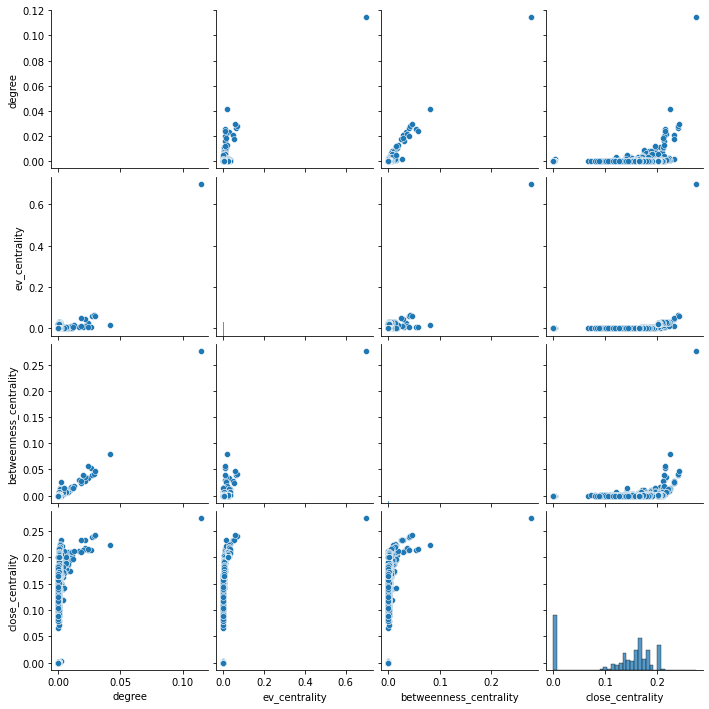

In [40]:
# visualize results for one mode
# --+ df
df = pd.DataFrame({'degree': deg_centrality, 'ev_centrality': ev_centrality,
                   'betweenness_centrality': bet_centrality}
                   )

df = pd.DataFrame({'degree': deg_centrality, 'ev_centrality': ev_centrality,
                   'betweenness_centrality': bet_centrality, 'close_centrality': close_centrality}
                   )

# --+ correlation matrix
df.corr()
# --+ scatter plot matrix
sns.pairplot(df)


#### Combining DF

In [78]:
# Combining the DataFrames

# userCloseCenDF

# userBetCenDF

# userEGCenDF

# userDegCenDF

UserCentralityOverview = pd.merge(left=userCloseCenDF, right=userBetCenDF, left_on='Node', right_on='Node', how='outer')
UserCentralityOverview = pd.merge(left=UserCentralityOverview, right=userEGCenDF, left_on='Node', right_on='Node', how='outer')
UserCentralityOverview = pd.merge(left=UserCentralityOverview, right=userDegCenDF, left_on='Node', right_on='Node', how='outer')

In [79]:
UserCentralityOverview

,Node,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Degree Centrality
0,0x28c6c06298d514db089934071355e5743bf21d60,0.273892213421851,0.27621937286641157,0.6979078007205464,0.11458893068242881
1,0x9696f59e4d72e237be84ffd425dcad154bf96976,0.24172594602878386,0.046530430861272544,0.058241838340022355,0.029554003224073082
2,0x4976a4a02f38326660d17bf34b431dc6e2eb2327,0.2407481781572068,0.04100815840989292,0.06518882820224381,0.02847931219774315
3,0x56eddb7aa87536c09ccc2793473599fd21a8b17f,0.2390293156625547,0.04019668245412406,0.06040686763611451,0.026867275658248254
4,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,0.23310039007823546,0.027761049783959074,0.04588056568582047,0.021225147770016124
5,0x21a31ee1afc51d94c2efccaa2092ad1028285549,0.23292301180553762,0.02406181116670976,0.050225832619191516,0.018135411069317573
6,0xedc7001e99a37c3d23b5f7974f837387e09f9c93,0.23258168636082932,0.026734112422631497,NaN,NaN
7,0x56e43d4f29a62a835aacd36db2725151874acca6,0.22485662562694303,NaN,0.032334620643368,NaN
8,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0.2242330370571022,0.07989949002676512,NaN,0.04137560451370231
9,0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873,0.223601229908598,0.015370708271054172,NaN,NaN


In [43]:
# Combining the DataFrames

# userCloseCenDF

# userBetCenDF

# userEGCenDF

# userDegCenDF

## Two-Mode Space

### Betweenness centrality

In [46]:
BS_bet_centrality = nx.betweenness_centrality(G_bipartiteSpace)
nx.set_node_attributes(G_bipartiteSpace, BS_bet_centrality, 'betweenness')


In [47]:
sorted_betweenness = sorted(
    BS_bet_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)


Top 20 nodes by betweenness centrality:
('0x7be8076f4ea4a4ad08075c2508e481d6c946d12b', 0.27059269222734056)
('0xe592427a0aece92de3edee1f18e0157c05861564', 0.1977027657936225)
('0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 0.1669287873918687)
('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 0.11949032468673085)
('0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f', 0.10554476161374106)
('0x881d40237659c251811cec9c364ef91dc08d300c', 0.09014272610984135)
('0x11111112542d85b3ef69ae05771c2dccff4faa26', 0.0567413853584944)
('0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb', 0.056087097892569104)
('0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 0.05372391154878347)
('0xb0ca2e19356f763721110b2e0b318883df844cbc', 0.052671067819606725)
('0x1262d7470ce687d5d7eb89db15f5c8a183b3eaa2', 0.04588834112839095)
('0x03f34be1bf910116595db1b11e9d1b2ca5d59659', 0.020391944194477974)
('0xdef1c0ded9bec7f1a1670819833240f027b25eff', 0.01901839642904806)
('0xc36442b4a4522e871399cd717abdd847ab11fe88', 0.018708993213709686)
('0xdc2

In [48]:
# %% computing the summary stats on between centrality

BS_bet_list = list(BS_bet_centrality.values())

print("""
==============================================
    Summary stats on between centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(BS_bet_list), np.min(BS_bet_list), np.max(BS_bet_list), np.std(BS_bet_list)))



    Summary stats on between centrality

Mu    :       0.000

Min   :         0.0
Max   :       0.27059269222734056


Sigma :       0.005




In [49]:
top20betcen = sorted_betweenness[0:20]
twospaceBetCenDF = pd.DataFrame(np.array(top20betcen),columns = ('Node', 'Betweenness Centrality'))


Betweenness centrality for edges 

In [50]:
# add tobie code

In [51]:
# bipartiteSpace?

### Eigenvector centrality

In [52]:
BS_ev_centrality = nx.eigenvector_centrality(G_bipartiteSpace, max_iter=200)



In [53]:
nx.set_node_attributes(G_bipartiteSpace, BS_ev_centrality, 'eigenvector centrality')


In [54]:
sorted_ev_centrality = sorted(
    BS_ev_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_ev_centrality[:20]:
    print(b)


Top 20 nodes by eigenvector centrality:
('0x7be8076f4ea4a4ad08075c2508e481d6c946d12b', 0.7018063629804847)
('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 0.06418727999706525)
('0xe592427a0aece92de3edee1f18e0157c05861564', 0.050262371118431404)
('0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 0.027215083316428298)
('0x37dd733885b76beb617abf2c790c1a75eab6f82a', 0.02501311543085569)
('0x036d78c5e87e0aa07bf61815d1effe10c9fd5275', 0.023851451660452876)
('0xae3f14970b77c4d2aedb6793e377c5dfc7ceba58', 0.02382882195305133)
('0x89688542873276cd7d9cea936b25f37778a593fd', 0.02349534221615114)
('0xc40df87e16339f21fbb2e59fb38bf2a957a16ffd', 0.02347288948043985)
('0x95dfdf0306945282016eb50212edf82054c00f96', 0.02347288948043985)
('0x21182c428147a78fee3eadecb59e508ad4f71988', 0.02347288948043985)
('0xb7dc1c26f1b893d4183d8014e341d1c6feb0b257', 0.02347288948043985)
('0x97a6c796fe543cabc2ca7ae026206e8b260c4da0', 0.02347288948043985)
('0xe08091839b13c94c7ef35810bbe252be6b5150d8', 0.02347288948043985)
('0x33

In [55]:
# %% computing the summary stats on eigenvector centrality

BS_eg_list = list(BS_ev_centrality.values())

print("""
==============================================
    Summary stats on eigenvector centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(BS_eg_list), np.min(BS_eg_list), np.max(BS_eg_list), np.std(BS_eg_list)))



    Summary stats on eigenvector centrality

Mu    :       0.004

Min   :       2.5354708654843562e-182
Max   :       0.7018063629804847


Sigma :       0.012




In [72]:
top20egcen = sorted_ev_centrality[0:20]
twospaceEGCenDF = pd.DataFrame(np.array(top20egcen),columns = ('Node', 'Eigenvector Centrality'))


### Degree centrality

In [57]:
BS_deg_centrality = nx.degree_centrality(G_bipartiteSpace)
nx.set_node_attributes(G_bipartiteSpace, BS_deg_centrality, 'degree centrality')


In [58]:
sorted_deg_centrality = sorted(
    BS_deg_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by degree centrality:")
for b in sorted_deg_centrality[:20]:
    print(b)


Top 20 nodes by degree centrality:
('0x7be8076f4ea4a4ad08075c2508e481d6c946d12b', 0.16426020804222946)
('0xe592427a0aece92de3edee1f18e0157c05861564', 0.12839621176835894)
('0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 0.11582052476323552)
('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 0.07219375873311597)
('0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f', 0.06738084148424157)
('0x881d40237659c251811cec9c364ef91dc08d300c', 0.057133985405992856)
('0x11111112542d85b3ef69ae05771c2dccff4faa26', 0.03788231641049526)
('0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2', 0.03586399627387052)
('0xfa52274dd61e1643d2205169732f29114bc240b3', 0.02918801428349635)
('0xc36442b4a4522e871399cd717abdd847ab11fe88', 0.01661232727837292)
('0xdef1c0ded9bec7f1a1670819833240f027b25eff', 0.014128240956373234)
('0x03f34be1bf910116595db1b11e9d1b2ca5d59659', 0.013817730166123272)
('0xa0c68c638235ee32657e8f720a23cec1bfc77c77', 0.009160068312373855)
('0xcc9a0b7c43dc2a5f023bb9b738e45b0ef6b06e04', 0.008694302126998912)
('0x4dbd

In [59]:
# %% computing the summary stats on degree centrality

BS_deg_list = list(BS_deg_centrality.values())

print("""
==============================================
    Summary stats on degree centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(BS_deg_list), np.min(BS_deg_list), np.max(BS_deg_list), np.std(BS_deg_list)))



    Summary stats on degree centrality

Mu    :       0.000

Min   :       0.0001552553951249806
Max   :       0.16426020804222946


Sigma :       0.003




In [68]:
top20degcen = sorted_deg_centrality[0:20]
twospaceDegCenDF = pd.DataFrame(np.array(top20degcen),columns = ('Node', 'Degree Centrality'))


### Closeness Centrality

In [61]:
BS_close_centrality = nx.closeness_centrality(G_bipartiteSpace)
nx.set_node_attributes(G_bipartiteSpace, BS_close_centrality, 'closeness centrality')

In [62]:
sorted_close_centrality = sorted(
    BS_close_centrality.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by closeness centrality:")
for b in sorted_close_centrality[:20]:
    print(b)


Top 20 nodes by closeness centrality:
('0x7be8076f4ea4a4ad08075c2508e481d6c946d12b', 0.26824433799471326)
('0xe592427a0aece92de3edee1f18e0157c05861564', 0.25414406339122514)
('0x7a250d5630b4cf539739df2c5dacb4c659f2488d', 0.24855411783085327)
('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 0.243763554068972)
('0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f', 0.24133007700175158)
('0x37dd733885b76beb617abf2c790c1a75eab6f82a', 0.23875053936159035)
('0x09b3ed5392df96c5691a5c3e793acb4dc47d089e', 0.2386610302865985)
('0xe2416008f80c575dca8281e3e600016023c5c105', 0.23750349015711492)
('0x881d40237659c251811cec9c364ef91dc08d300c', 0.23526523737029395)
('0x11111112542d85b3ef69ae05771c2dccff4faa26', 0.23362475556344256)
('0x97bbcedf9424a1b1beecf6d62132849bdabd2632', 0.23361046658756712)
('0x53afeb120edce5d778cab7de76d34f5fcd92c7d0', 0.23182393352189382)
('0x036d78c5e87e0aa07bf61815d1effe10c9fd5275', 0.22814067188548098)
('0xae3f14970b77c4d2aedb6793e377c5dfc7ceba58', 0.2280317091765207)
('0x025b96fac9

In [63]:
# %% computing the summary stats on closeness centrality

BS_close_list = list(BS_close_centrality.values())

print("""
==============================================
    Summary stats on closeness centrality
==============================================

Mu    :       {:.3f}

Min   :       {:>5}
Max   :       {:>5}


Sigma :       {:.3f}

""".format(np.mean(BS_close_list), np.min(BS_close_list), np.max(BS_close_list), np.std(BS_close_list)))



    Summary stats on closeness centrality

Mu    :       0.138

Min   :       0.0001552553951249806
Max   :       0.26824433799471326


Sigma :       0.077




In [69]:
top20closecen = sorted_close_centrality[0:20]
twospaceCloseCenDF = pd.DataFrame(np.array(top20closecen),columns = ('Node', 'Closeness Centrality'))


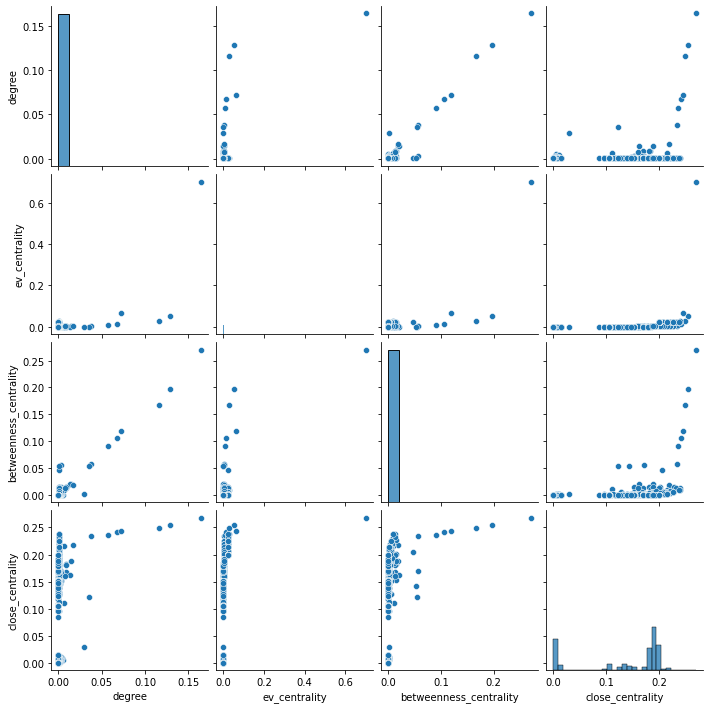

In [65]:
# visualize results
# --+ df
df = pd.DataFrame({'degree': BS_deg_centrality, 'ev_centrality': BS_ev_centrality,
                   'betweenness_centrality': BS_bet_centrality, 'close_centrality' : BS_close_centrality}
                   )

# df = pd.DataFrame({'degree': deg_centrality, 'ev_centrality': ev_centrality,
#                    'betweenness_centrality': bet_centrality, 'close_centrality': close_centrality}
#                    )

# --+ correlation matrix
df.corr()
# --+ scatter plot matrix
sns.pairplot(df)


In [73]:
#### Dataframe Centrality Overview

# Combining the DataFrames



# twospaceBetCenDF
# twospaceCloseCenDF
# twospaceDegCenDF
# twospaceEGCenDF

TwoSpaceCentralityOverview = pd.merge(left=twospaceBetCenDF, right=twospaceCloseCenDF, left_on='Node', right_on='Node', how='outer')
TwoSpaceCentralityOverview = pd.merge(left=TwoSpaceCentralityOverview, right=twospaceDegCenDF, left_on='Node', right_on='Node', how='outer')
TwoSpaceCentralityOverview = pd.merge(left=TwoSpaceCentralityOverview, right=twospaceEGCenDF, left_on='Node', right_on='Node', how='outer')

In [74]:
TwoSpaceCentralityOverview

,Node,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality
0,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,0.27059269222734056,0.26824433799471326,0.16426020804222946,0.7018063629804847
1,0xe592427a0aece92de3edee1f18e0157c05861564,0.1977027657936225,0.25414406339122514,0.12839621176835894,0.050262371118431404
2,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0.1669287873918687,0.24855411783085327,0.11582052476323552,0.027215083316428298
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.11949032468673085,0.243763554068972,0.07219375873311597,0.06418727999706525
4,0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f,0.10554476161374106,0.24133007700175158,0.06738084148424157,NaN
5,0x881d40237659c251811cec9c364ef91dc08d300c,0.09014272610984135,0.23526523737029395,0.057133985405992856,NaN
6,0x11111112542d85b3ef69ae05771c2dccff4faa26,0.0567413853584944,0.23362475556344256,0.03788231641049526,NaN
7,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,0.056087097892569104,NaN,NaN,NaN
8,0x1a2a1c938ce3ec39b6d47113c7955baa9dd454f2,0.05372391154878347,NaN,0.03586399627387052,NaN
9,0xb0ca2e19356f763721110b2e0b318883df844cbc,0.052671067819606725,NaN,NaN,NaN


In [80]:
UserCentralityOverview.to_csv('UserCentrality.csv')
TwoSpaceCentralityOverview.to_csv('TwoSpaceCentrality.csv')